> Все функции я потом добавлю в финальную тетрадку (если понадобятся) - например, reduce_mem_usage, splitting_pandas_to_pool

In [1]:
#Добавление snippets в path
from sys import path
path.append('D:\\jupiter\\snippets')

import itertools as it

import pandas as pd
import numpy as np
from scipy import signal

from table import reduce_mem_usage

%pylab inline
plt.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


# 1. 2020 года (agents2020.csv) 

* Базовый год 2020 
* Прогноз на 2021

## Загрузка данных

In [2]:
data = pd.read_csv("./data/agents2020.csv")
data = reduce_mem_usage(data, verbose=True)
data.head()

Mem. usage decreased to  0.38 Mb (27.9% reduction)


,Наименование ДП,Факт. 1,Факт. 2,Факт. 3,Факт. 4,Факт. 5,Факт. 6,Факт. 7,Факт. 8,Факт. 9,...,"2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
0,0,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,3.438313e+10,2.673481e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.603784e+09,3.280355e+09,6.200120e+09,8.716191e+08,3.658634e+09
1,1,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,4.169796e+08,5.349956e+08,1.212357e+07,6.944586e+06,4.480064e+07,8.747516e+07,1.630064e+07,1.109172e+07,5.135732e+07,9.411019e+07
2,2,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,2.316724e+09,2.460679e+09,5.026662e+08,3.644229e+08,8.552994e+07,-6.456440e+08,4.148586e+08,1.611318e+08,-9.298981e+07,-1.207210e+08
3,3,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,1.171315e+10,1.272604e+10,4.100857e+09,4.481281e+09,6.840634e+09,3.999298e+09,4.903117e+09,5.186553e+09,7.869977e+09,4.029232e+09
4,4,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,2.652547e+10,3.055828e+10,7.163980e+10,3.799862e+10,4.593606e+10,4.960408e+10,2.338912e+10,3.727985e+10,5.307524e+10,5.622122e+10


## EDA
1. Общая статистика 
2. Распределения
3. Синтетические признаки

In [3]:
print("=" * 5 + " Общая статистика контрагентов " + "=" * 5)
print(f"{'Всего данных':30s}:{len(data)}")
print(f"{'Уникальных контрагентов':30s}:{data['Наименование ДП'].nunique()}")
print(f"{'Среднее значение макс. ПДЗ':30s}:{data['Макс. ПДЗ за 2020 год, дней'].mean()}")
print(f"{'Медианное значение макс. ПДЗ':30s}:{data['Макс. ПДЗ за 2020 год, дней'].median()}")

===== Общая статистика контрагентов =====
Всего данных                  :531
Уникальных контрагентов       :531
Среднее значение макс. ПДЗ    :26.92467043314501
Медианное значение макс. ПДЗ  :5.0


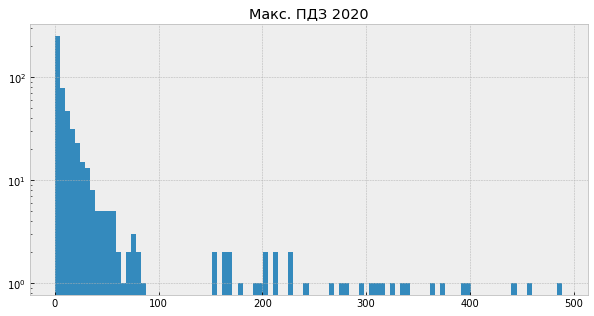

In [4]:
fig, ax = plt.subplots(1, figsize=(10,5))
data["Макс. ПДЗ за 2020 год, дней"].hist(bins=100, ax=ax)
ax.set_title("Макс. ПДЗ 2020")
ax.set_yscale("log")
plt.show()

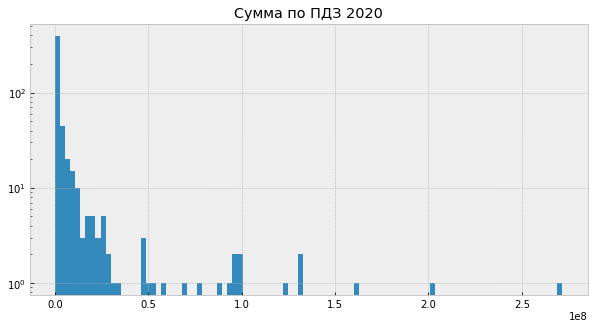

In [5]:
fig, ax = plt.subplots(1, figsize=(10,5))
data["Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб."].hist(bins=100, ax=ax)
ax.set_title("Сумма по ПДЗ 2020")
ax.set_yscale("log")
plt.show()

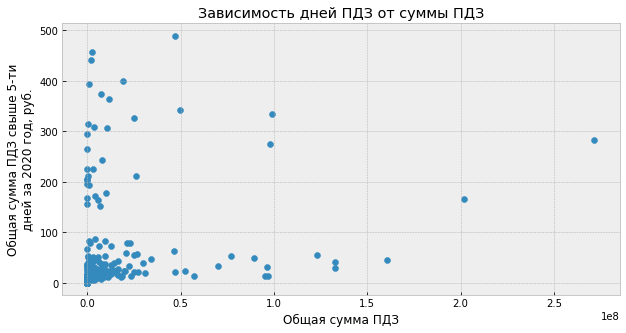

In [6]:
fig, ax = plt.subplots(1, figsize=(10,5))
plt.scatter(data["Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб."], data["Макс. ПДЗ за 2020 год, дней"])
ax.set_title("Зависимость дней ПДЗ от суммы ПДЗ")
ax.set_ylabel("Общая сумма ПДЗ свыше 5-ти\nдней за 2020 год, руб.")
ax.set_xlabel("Общая сумма ПДЗ")
#ax.set_yscale("log")
plt.show()

In [7]:
print("Проверка на отрицательные значения ПДЗ [количество] - дней:", end=" ")
print(len(data[data["Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб."] < 0]), end=", в деньгах: ")
print(len(data[data["Макс. ПДЗ за 2020 год, дней"] < 0]))

Проверка на отрицательные значения ПДЗ [количество] - дней: 0, в деньгах: 0


**Преобразование фичей - внутренние факторы**

* X - преобразуем в -1
* Nan - преобразуем в -2

Не очень оптимально 😗

In [8]:
for col in [x for x in data.columns if "Факт" in x]:
    data[str(col) + "_X_cat"] = 0
    data[str(col) + "_НД_cat"] = 0
    data.at[data[col] == "Х", str(col) + "_X_cat"] = 1
    data.at[data[col] == "Н/Д", str(col) + "_НД_cat"] = 1
    data.at[data[col] == "Х", col] = -1
    data.at[data[col] == "Н/Д", col] = -2
    data[col] = data[col].astype(int)
    

C:\Users\admin\AppData\Local\Temp/ipykernel_10540/222612522.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[str(col) + "_НД_cat"] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_10540/222612522.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[str(col) + "_X_cat"] = 0


In [9]:
#Промежуточное сохранение
data.to_csv("./data/clean_2020.csv", index=False)

## Значимость признаков

Средние значения признаков, наиболее важны синтетические признаки "Факт. N_", т.к. позволяет оценить репрезентативность внутренних признаков.

In [10]:
print(f"{'Признак':50s}|Среднее значение\n{'-' * 50}|{'-' * 20}")
non_represantative = []
for i in data.columns:
    temp_mean = data[i].mean()
    print(f"{i:50s}|{temp_mean:.3f}")
    if "_X" in i or  "Н/Д" in i:
        if temp_mean > .95:
            non_represantative.append(i)

Признак                                           |Среднее значение
--------------------------------------------------|--------------------
Наименование ДП                                   |265.000
Факт. 1                                           |-0.241
Факт. 2                                           |0.522
Факт. 3                                           |1.853
Факт. 4                                           |-1.000
Факт. 5                                           |-0.812
Факт. 6                                           |-1.002
Факт. 7                                           |-0.620
Факт. 8                                           |-1.000
Факт. 9                                           |-1.002
Факт. 10                                          |-1.002
Факт. 11                                          |-1.000
Факт. 12                                          |-0.241
Факт. 13                                          |-0.810
Факт. 14                                         

**Нерабочие признаки отбрасываем**

порог: $\ge0.95$ для среднего значения `_НД` или `_X`

In [11]:
print("Количество нерепрезантативных признаки: ", len(non_represantative))

Количество нерепрезантативных признаки:  52


In [12]:
for feature in non_represantative:
    drop_features = [feature.split("_")[0], feature.split("_")[0] + "_X_cat", feature.split("_")[0] + "_НД_cat"]
    data = data.drop(columns=drop_features)

In [13]:
print("Количество признаков после отчистки: ", len(data.columns))

Количество признаков после отчистки:  95


In [14]:
#Промежуточное сохранение
data.to_csv("./data/drop_facts_2020.csv", index=False)

### Синтетические признаки


0. Бинарная классификация (0 - не было ПДЗ, 1 - была)
1. Уставный капитал 
    * добавляем категорию "нет сведений о уставном капитале" (`no_init_cap`);
    * добавляем значение динамики уставного капитала (`init_cap_dyn`) - регрессия по историческим данным
    * тренд по всем значениям по подобию `no_init_cap` и `no_init_cap` - они будут переопределены в конце раздела для однообразия

**Ниже [до следующей черты] подробный разбор добавления признаков**

------------------------

In [15]:
init_cap = ("2016, Уставный капитал , RUB", "2017, Уставный капитал , RUB", "2018, Уставный капитал , RUB", "2019, Уставный капитал , RUB")
print(f"Количество \'0\' в установочном капитале\n2016: {len(data[data[init_cap[0]] == 0])}\n2017: {len(data[data[init_cap[1]] == 0])}\
\n2018: {len(data[data[init_cap[2]] == 0])}\n2019: {len(data[data[init_cap[3]] == 0])}")

Количество '0' в установочном капитале
2016: 131
2017: 123
2018: 73
2019: 66


In [16]:
tuple(it.combinations(init_cap, r=2))

(('2016, Уставный капитал , RUB', '2017, Уставный капитал , RUB'),
 ('2016, Уставный капитал , RUB', '2018, Уставный капитал , RUB'),
 ('2016, Уставный капитал , RUB', '2019, Уставный капитал , RUB'),
 ('2017, Уставный капитал , RUB', '2018, Уставный капитал , RUB'),
 ('2017, Уставный капитал , RUB', '2019, Уставный капитал , RUB'),
 ('2018, Уставный капитал , RUB', '2019, Уставный капитал , RUB'))

In [17]:
print("Количество \'0\' в парах годов и во всей истории:")
temp_names = tuple(it.combinations(init_cap, r=2))
couter = {"2016,2017": 0, "2016,2018": 0, "2016,2019": 0, "2016-2019": 0}
for idx in range(len(data)):
    if data.iloc[idx][temp_names[0][0]] == 0 and data.iloc[idx][temp_names[0][1]] == 0:
        couter["2016,2017"] += 1
    if data.iloc[idx][temp_names[1][0]] == 0 and data.iloc[idx][temp_names[1][1]] == 0:
        couter["2016,2018"] += 1
    if data.iloc[idx][temp_names[2][0]] == 0 and data.iloc[idx][temp_names[2][1]] == 0:
        couter["2016,2019"] += 1
    if data.iloc[idx][temp_names[1][0]] == 0 and data.iloc[idx][temp_names[0][1]] == 0\
        and data.iloc[idx][temp_names[2][1]] == 0 and data.iloc[idx][temp_names[3][1]] == 0:
        couter["2016-2019"] += 1
for k, v in couter.items():
    print(f"{k}: {v}")
del couter

Количество '0' в парах годов и во всей истории:
2016,2017: 107
2016,2018: 62
2016,2019: 53
2016-2019: 52


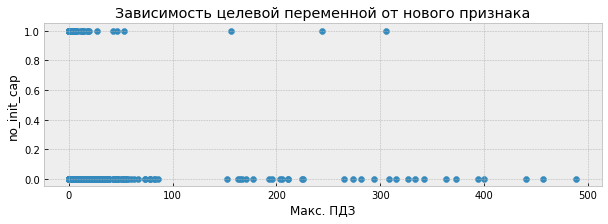

In [18]:
data["no_init_cap"] = 0
data.at[(data[init_cap[0]] == 0) & (data[init_cap[1]] == 0) & (data[init_cap[2]] == 0) & (data[init_cap[3]] == 0), "no_init_cap"] = 1
plt.figure(figsize=(10, 3))
plt.scatter(data["Макс. ПДЗ за 2020 год, дней"], data["no_init_cap"])
plt.title("Зависимость целевой переменной от нового признака")
plt.xlabel("Макс. ПДЗ")
plt.ylabel("no_init_cap")
plt.show()

In [19]:
for pair in temp_names:
    temp = data[(data[pair[0]] != 0) & (data[pair[1]] != 0)][pair[0]] - data[(data[pair[0]] != 0) & (data[pair[1]] != 0)][pair[1]]
    if sum(temp > 0):
        print(f"Изменение {pair[0].split(',')[0]},{pair[1].split(',')[0]}: [средняя разница {temp.mean():.1f}] строки {tuple(temp[temp > 0].index)}")

Изменение 2016,2017: [средняя разница -27965378.0] строки (85, 250)
Изменение 2016,2018: [средняя разница -33332784.0] строки (28, 54, 85, 250, 351, 365, 456)
Изменение 2016,2019: [средняя разница -165059936.0] строки (85, 250, 351, 365, 367, 456)
Изменение 2017,2018: [средняя разница -10463125.0] строки (28, 54, 351, 365, 455, 456)
Изменение 2017,2019: [средняя разница -161726368.0] строки (351, 365, 367, 455, 456)
Изменение 2018,2019: [средняя разница -149171456.0] строки (367, 443)


In [20]:
def trendline(data, order=1):
    coeffs = np.polyfit([x for x in range(len(data))], data, order)
    slope = coeffs[-2]
    return float(slope)

In [21]:
data["init_cap_dyn"] = 0
for idx in data[(data[init_cap[0]] != 0) & (data[init_cap[1]] != 0) & (data[init_cap[2]] != 0) & (data[init_cap[2]] != 0)].index:
    data.at[idx, "init_cap_dyn"] = trendline([data.loc[idx, init_cap[0]], data.loc[idx, init_cap[1]], data.loc[idx, init_cap[2]], data.loc[idx, init_cap[3]]])

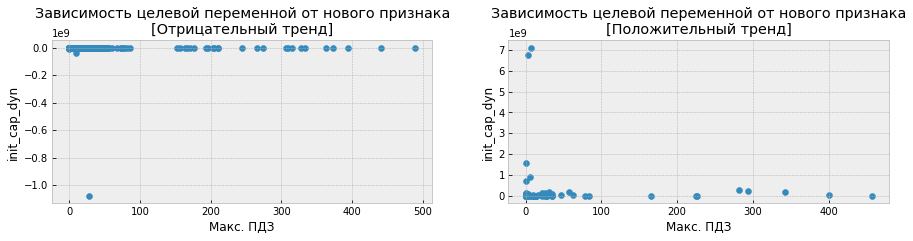

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax[0].scatter(data[data["init_cap_dyn"] <= 0]["Макс. ПДЗ за 2020 год, дней"], data[data["init_cap_dyn"] <= 0]["init_cap_dyn"])
ax[0].set_title("Зависимость целевой переменной от нового признака\n[Отрицательный тренд]")
ax[0].set_xlabel("Макс. ПДЗ")
ax[0].set_ylabel("init_cap_dyn")
ax[1].scatter(data[data["init_cap_dyn"] > 0]["Макс. ПДЗ за 2020 год, дней"], data[data["init_cap_dyn"] > 0]["init_cap_dyn"])
ax[1].set_title("Зависимость целевой переменной от нового признака\n[Положительный тренд]")
ax[1].set_xlabel("Макс. ПДЗ")
ax[1].set_ylabel("init_cap_dyn")
plt.show()

------------------------------

**! столбцы `no_init_cap` и `init_cap_dyn` удаляются для однообразия!**

In [23]:
# Загрузка промежуточного результата
data = pd.read_csv("./data/drop_facts_2020.csv")
data = reduce_mem_usage(data, verbose=True)
data.head()

Mem. usage decreased to  0.15 Mb (60.5% reduction)


,Наименование ДП,Факт. 29,Факт. 31,Факт. 33,Факт. 49,Факт. 51,Факт. 54,Факт. 59,Факт. 60,Итого,...,Факт. 49_X_cat,Факт. 49_НД_cat,Факт. 51_X_cat,Факт. 51_НД_cat,Факт. 54_X_cat,Факт. 54_НД_cat,Факт. 59_X_cat,Факт. 59_НД_cat,Факт. 60_X_cat,Факт. 60_НД_cat
0,0,-1,-1,-1,10,-1,-2,-1,-1,10.0,...,0,0,1,0,0,1,1,0,1,0
1,1,-1,-1,-1,10,-1,10,-1,-1,20.0,...,0,0,1,0,0,0,1,0,1,0
2,2,30,-1,-1,10,-1,-2,-1,-1,40.0,...,0,0,1,0,0,1,1,0,1,0
3,3,-1,-1,-1,-1,-2,10,-1,-1,10.0,...,1,0,0,1,0,0,1,0,1,0
4,4,-1,-1,-1,10,-1,10,-1,-1,20.0,...,0,0,1,0,0,0,1,0,1,0


2. Построение трендов по всем признакам, имеющим историю

In [24]:
ts_features = {}
for feature in data.columns:
    if feature[:2] == "20" and feature[6:] not in ts_features.keys():
        ts_features[feature[6:]] = []

for feature in data.columns:
    if feature[6:] in ts_features.keys():
        ts_features[feature[6:]].append(feature[:4])

# Сортировка, если перепутана темпоральность
for key, value in ts_features.items():
    ts_features[key] = sort(value)
        
print(f"Признаки с глубиной по времени\n{'признак':45s}|доступные годы\n{'-' * 45}|{'-' * 25}")
for key, value in ts_features.items():
    print(f"{key:45s}|{', '.join(value)}")

Признаки с глубиной по времени
признак                                      |доступные годы
---------------------------------------------|-------------------------
Нематериальные активы, RUB                   |2016, 2017, 2018, 2019
Основные средства , RUB                      |2016, 2017, 2018, 2019
Внеоборотные активы, RUB                     |2016, 2017, 2018, 2019
Дебиторская задолженность, RUB               |2016, 2017, 2018, 2019
Оборотные активы, RUB                        |2016, 2017, 2018, 2019
Уставный капитал , RUB                       |2016, 2017, 2018, 2019
Капитал и резервы, RUB                       |2016, 2017, 2018, 2019
Заёмные средства (долгосрочные), RUB         |2016, 2017, 2018, 2019
Долгосрочные обязательства, RUB              |2016, 2017, 2018, 2019
Заёмные средства (краткосрочные), RUB        |2016, 2017, 2018, 2019
Кредиторская задолженность, RUB              |2016, 2017, 2018, 2019
Краткосрочные обязательства, RUB             |2016, 2017, 2018, 2019
Выручка,

In [25]:
def regressor_on_feature(data: pd.DataFrame, cols: list, new_name: str, suffix: str="_reg", cat_suffix: str="_cat") -> pd.DataFrame:
    """Построение регрессии на основе секции выше: если есть строки со всеми нулями - добавление категориального признака, построение тренда"""
    
    triplets = data[(data[cols[0]] == 0) & (data[cols[1]] == 0) & (data[cols[2]] == 0) & (data[cols[3]] == 0)]
    print(f"Количество четверок с \'0\': {len(triplets)}, ", end=" ")
    print(f"Добавление категорильной переменной \'{new_name + cat_suffix}\'")
    data[new_name + cat_suffix] = 0
    data.at[triplets.index, new_name + cat_suffix] = 1
    data[new_name + cat_suffix] = data[new_name + cat_suffix].astype(int)
        
    data[new_name + suffix] = 0
    for idx in data[(data[cols[0]] != 0) & (data[cols[1]] != 0) & (data[cols[2]] != 0) & (data[cols[3]] != 0)].index:
        data.at[idx, new_name + suffix] = trendline([data.loc[idx, cols[0]], data.loc[idx, cols[1]], data.loc[idx, cols[2]], data.loc[idx, cols[3]]])
    return data

In [26]:
# Добавление признаков в датафрейм
for idx, (key, value) in enumerate(ts_features.items()):
    print(f"Обработка \'{key}\':", end="\n   ")
    data = regressor_on_feature(data, [f"{value[0]}, {key}", f"{value[1]}, {key}", f"{value[2]}, {key}", f"{value[3]}, {key}"], key)

Обработка 'Нематериальные активы, RUB':
   Количество четверок с '0': 321,  Добавление категорильной переменной 'Нематериальные активы, RUB_cat'
Обработка 'Основные средства , RUB':
   Количество четверок с '0': 20,  Добавление категорильной переменной 'Основные средства , RUB_cat'
Обработка 'Внеоборотные активы, RUB':
   Количество четверок с '0': 15,  Добавление категорильной переменной 'Внеоборотные активы, RUB_cat'
Обработка 'Дебиторская задолженность, RUB':
   Количество четверок с '0': 4,  Добавление категорильной переменной 'Дебиторская задолженность, RUB_cat'
Обработка 'Оборотные активы, RUB':
   Количество четверок с '0': 4,  Добавление категорильной переменной 'Оборотные активы, RUB_cat'
Обработка 'Уставный капитал , RUB':
   Количество четверок с '0': 52,  Добавление категорильной переменной 'Уставный капитал , RUB_cat'
Обработка 'Капитал и резервы, RUB':
   Количество четверок с '0': 4,  Добавление категорильной переменной 'Капитал и резервы, RUB_cat'
Обработка 'Заёмные сре

In [27]:
data.head()

,Наименование ДП,Факт. 29,Факт. 31,Факт. 33,Факт. 49,Факт. 51,Факт. 54,Факт. 59,Факт. 60,Итого,...,"Краткосрочные обязательства, RUB_cat","Краткосрочные обязательства, RUB_reg","Выручка, RUB_cat","Выручка, RUB_reg","Себестоимость продаж, RUB_cat","Себестоимость продаж, RUB_reg","Прибыль (убыток) до налогообложения , RUB_cat","Прибыль (убыток) до налогообложения , RUB_reg","Прибыль (убыток) от продажи, RUB_cat","Прибыль (убыток) от продажи, RUB_reg"
0,0,-1,-1,-1,10,-1,-2,-1,-1,10.0,...,0,-35299558,0,1242431283,0,1652870144,0,-414922201,0,-419366547
1,1,-1,-1,-1,10,-1,10,-1,-1,20.0,...,0,50893568,0,169197271,0,119938918,0,26391082,0,27369426
2,2,30,-1,-1,10,-1,-2,-1,-1,40.0,...,0,29325478,0,-20408473,0,140593548,0,-372382363,0,-186086047
3,3,-1,-1,-1,-1,-2,10,-1,-1,10.0,...,0,275880601,0,959612518,0,883138867,0,205467776,0,6177100
4,4,-1,-1,-1,10,-1,10,-1,-1,20.0,...,0,-2386461081,0,16032160972,0,3629485670,0,-5816972902,0,11429171200


### Добавление макроэкономики

4. Индексы производства по отдельным видам экономической деятельности ОКВЭД2 Российской Федерации (на 3 года назад 2019, 2018, 2017)
    * Производство металлургическое
    * Производство стальных труб, полых профилей и фитингов
    * Производство прочих стальных изделий первичной обработкой
    * Производство готовых металлических изделий, кроме машин и оборудования
    * Производство машин и оборудования, не включенных в другие группировки
5. Курс USD/RUB ЦБ РФ
    * На 1 января года
    * Максимальный за год
    * Минимальный за год
6. Макроэкономические показатели [investing.com](https://www.investing.com/)
    * Индекс цен производителей по отраслям: производство деталей из порошковой металлургии
    * Рост ВВП(реальный) в процентах (со смещением)
    * Уровень безработицы в % (со смещением)
    * Уровень инфляции в % (со смещением)
    * Стоимость акции (CHMF) на начало года
    * Индекс (LMEX) Лондонская биржа металлов

In [28]:
addition_data = {
    "metallurgical_production_index" : [99.7, 100.1, 101.7],
    "manufacture_of_steel_pipes" : [95.3, 106.3, 103.2],
    "manufacture_of_other_steel_products" : [104.9, 106.1, 102.7],
    "final_metal_products" : [112.7, 103.4, 101.3],
    "machines_products" : [101.5, 106.8, 99.4],
    "usd_rub_init" : [72.92, 59.89, 57.04],
    "usd_rub_min" : [60.27, 55.84, 57.67],
    "usd_rub_max" : [83.59, 60.75, 69.97],
}

addition_data_2 = {
    "ppi_pd" : [123.1, 124.6, 125.5, 127.3, 127.6],# 128.5],
    "usd_rub_init" : [74.84, 60.98, 56.13, 68.44, 63.59],# 75.15],
    "gdp" : [-2,0.2,1.8 ,2.8 ,2],#-3], 
    "unemployment" : [5.6, 5.5, 5.2, 4.8, 4.6],# 5.8],
    "inflation" : [12.91, 5.39, 2.51, 4.26, 5.5],# 4.91],
    "share" : [611, 637, 908, 985, 899],# 1293],
    "lmex" : [2158, 2753, 3389, 2908, 2597],# 3453]    
}

In [29]:
for key, value in addition_data.items():
    for year, item_year in enumerate(value, start=2016):
        data[key + "_" + str(year)] = item_year

for key, value in addition_data_2.items():
    for year, item_year in enumerate(value, start=2016):
        data[key + "_" + str(year)] = item_year

7. Обобщенный показетель потенциала контрагента - "потенциал"

In [30]:
data['new_potential'] =  data['2019, Нематериальные активы, RUB']+ \
data['2019, Основные средства , RUB']+ \
data['2019, Внеоборотные активы, RUB']+\
data['2019, Оборотные активы, RUB'] + \
data['2019, Капитал и резервы, RUB'] + \
data['2019, Прибыль (убыток) до налогообложения , RUB'] + \
data['2019, Прибыль (убыток) от продажи, RUB'] - \
data['2019, Дебиторская задолженность, RUB'] - \
data['2019, Заёмные средства (долгосрочные), RUB'] - \
data['2019, Долгосрочные обязательства, RUB'] - \
data['2019, Заёмные средства (краткосрочные), RUB'] - \
data['2019, Кредиторская задолженность, RUB'] -\
data['2019, Краткосрочные обязательства, RUB']

In [31]:
#Промежуточное сохранение
data.to_csv("./data/clean_fe_2020.csv", index=False)

### Преобразование к задаче классификации

Бинарный случай (факт просрочки)

|Класс|Критерий|Класс|Критерий|Класс|Критерий|
|---|---|---|---|---|---|
|0| $==0$|0| $<=30$|0| $<=60$|
|1| $>0$|1| $>30$|1| $>60$|

In [32]:
from cat_boost import splitting_pandas_to_pool
from catboost import CatBoostClassifier

In [33]:
# Загрузка данных после конструирования признаков
data = pd.read_csv("./data/clean_fe_2020.csv")
data = reduce_mem_usage(data, verbose=True)
data.head()

Mem. usage decreased to  0.33 Mb (56.4% reduction)


,Наименование ДП,Факт. 29,Факт. 31,Факт. 33,Факт. 49,Факт. 51,Факт. 54,Факт. 59,Факт. 60,Итого,...,share_2017,share_2018,share_2019,share_2020,lmex_2016,lmex_2017,lmex_2018,lmex_2019,lmex_2020,new_potential
0,0,-1,-1,-1,10,-1,-2,-1,-1,10.0,...,637,908,985,899,2158,2753,3389,2908,2597,1.343735e+10
1,1,-1,-1,-1,10,-1,10,-1,-1,20.0,...,637,908,985,899,2158,2753,3389,2908,2597,7.719981e+08
2,2,30,-1,-1,10,-1,-2,-1,-1,40.0,...,637,908,985,899,2158,2753,3389,2908,2597,3.583325e+09
3,3,-1,-1,-1,-1,-2,10,-1,-1,10.0,...,637,908,985,899,2158,2753,3389,2908,2597,4.421276e+10
4,4,-1,-1,-1,10,-1,10,-1,-1,20.0,...,637,908,985,899,2158,2753,3389,2908,2597,1.234203e+10


In [34]:
# предотвращаем data leak
targets = [x for x in data.columns if "ПДЗ" in x] + ["Кол-во просрочек свыше 5-ти дней за 2020 год, шт."]
NUM_COLS = [x for x in data.drop(columns=targets + ["Наименование ДП"]).columns if "_cat" not in x]
CAT_COLS = [x for x in data.drop(columns=targets + ["Наименование ДП"]).columns if "_cat" in x]

> Основные параметры

In [35]:
# Гиперпараметры поиска по сетке
ROUND_EPOCHS = 10
GS_ITERS = 100
# Параметры обучения лучшего классификатора
FINAL_EPOCHS = 200

In [36]:
grid_search_res = {}
for i in (0, 30, 60):
    print(f"Поиск по сетке для порога {i}, признак \'Макс. ПДЗ за 2020 год, дней\'")
    data["target"] = (data["Макс. ПДЗ за 2020 год, дней"] > i).astype(int)
    f = open(f"./logs/2020_gs_cb_{i}.log", "w")
    model = CatBoostClassifier(
        iterations=GS_ITERS,
        early_stopping_rounds=ROUND_EPOCHS,
        grow_policy = 'Depthwise',
        depth=8,
        loss_function='CrossEntropy',
        random_state=42,
        l2_leaf_reg = 1,
        learning_rate=0.03,
        eval_metric='CrossEntropy',
        task_type="GPU",
        silent=True,
    )

    params = {'l2_leaf_reg':[0.8, 1,],
              'learning_rate': [0.01,0.5,0.1],
              'depth':[10,12],
              'border_count':[128,64,256],
              'max_ctr_complexity': [4,6,8,10]
             }

    grid_search_res[f"target_{i}"] = model.grid_search(
        params, data.drop(columns=targets + ["Наименование ДП"]).reindex(columns = sorted(list(data.columns))), data["target"], search_by_train_test_split=False,
        plot=False, verbose=False, log_cout=f, cv=3
    )["params"]

    f.close()
    print()

Поиск по сетке для порога 0, признак 'Макс. ПДЗ за 2020 год, дней'

Поиск по сетке для порога 30, признак 'Макс. ПДЗ за 2020 год, дней'

Поиск по сетке для порога 60, признак 'Макс. ПДЗ за 2020 год, дней'



Построение графиков результатов поиска по сетке

In [37]:
def parse_log(name: str):
    with open(name, "r") as f:
        log = f.readlines()
    i = 0
    eval_log = []
    while i < len(log):
        eval_log.append((
            float(log[i + 1].split("=")[1]),
            float(log[i + 4].split("=")[1]),
            float(log[i + 7].split("=")[1])
        ))
        i += 9
    eval_log = np.array(eval_log)
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    ax[0].scatter([x for x in range(eval_log.shape[0])], eval_log[:, 0], label="CV 1")
    ax[0].scatter([x for x in range(eval_log.shape[0])], eval_log[:, 1], label="CV 2")
    ax[0].scatter([x for x in range(eval_log.shape[0])], eval_log[:, 2], label="CV 3")
    ax[0].set_title(f"Поиск по сетке (CV на 3 фолда)\nЛог: {name}")
    ax[0].set_xlabel("Номер комбинации гиперпараметров")
    ax[0].set_ylabel("Бинарная кросс-энтропия\nлогарифмический масштаб")
    ax[0].set_yscale("log")
    ax[0].legend(loc="best")
    ax[1].bar([x for x in range(eval_log.shape[0])], np.mean(eval_log, axis=1))
    ax[1].set_title(f"Поиск по сетке (CV на 3 фолда - среднее)\nЛог: {name}")
    ax[1].set_xlabel("Номер комбинации гиперпараметров")
    ax[1].set_ylabel("Бинарная кросс-энтропия\nлогарифмический масштаб")
    ax[1].set_yscale("log")
    plt.show()

## Результаты обучения классификатора по признаку Просрочка 0 (факт просрочки)

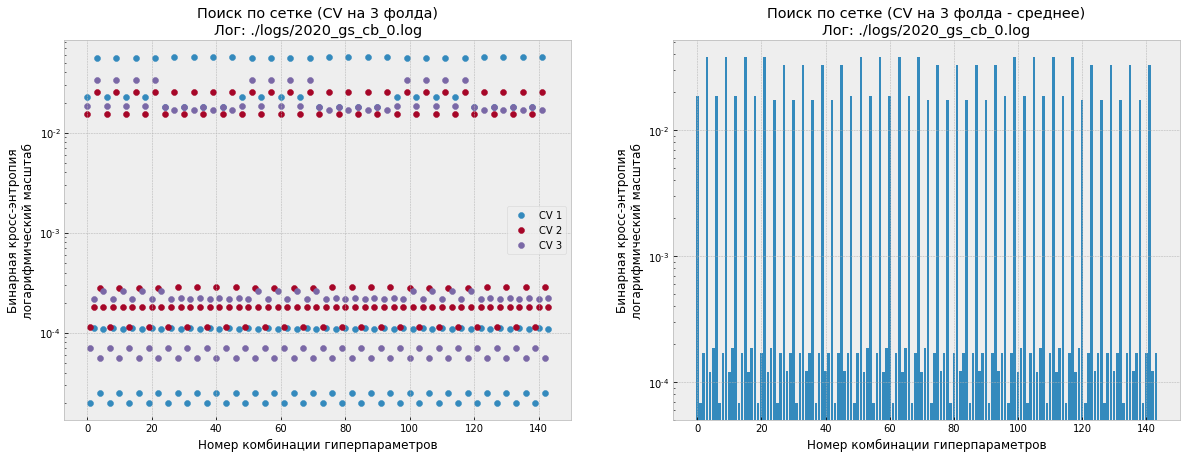

In [38]:
parse_log("./logs/2020_gs_cb_0.log")

## Результаты обучения классификатора по признаку Просрочка 30 (факт просрочки свыше 30 дней)

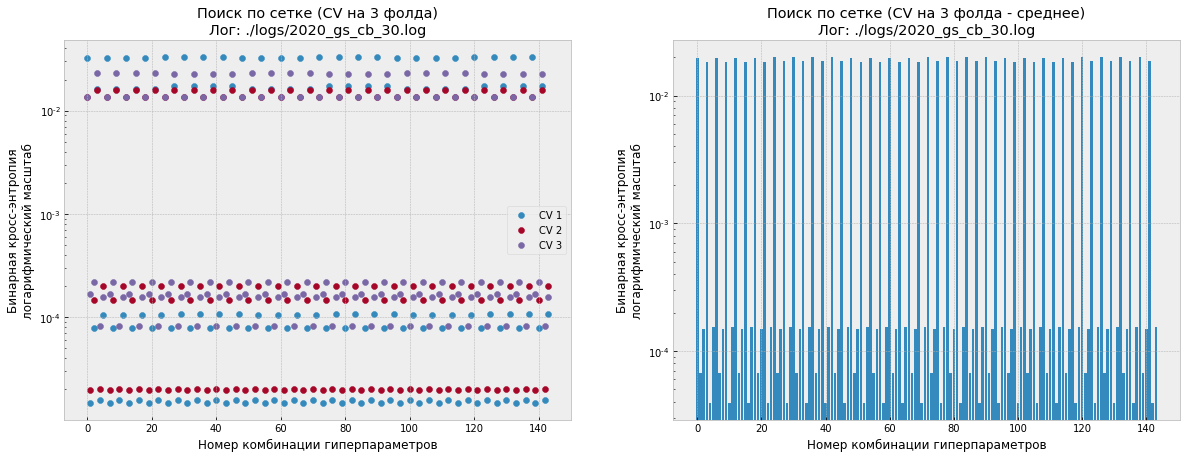

In [39]:
parse_log("./logs/2020_gs_cb_30.log")

## Результаты обучения классификатора по признаку Просрочка 60 (факт просрочки свыше 60 дней)

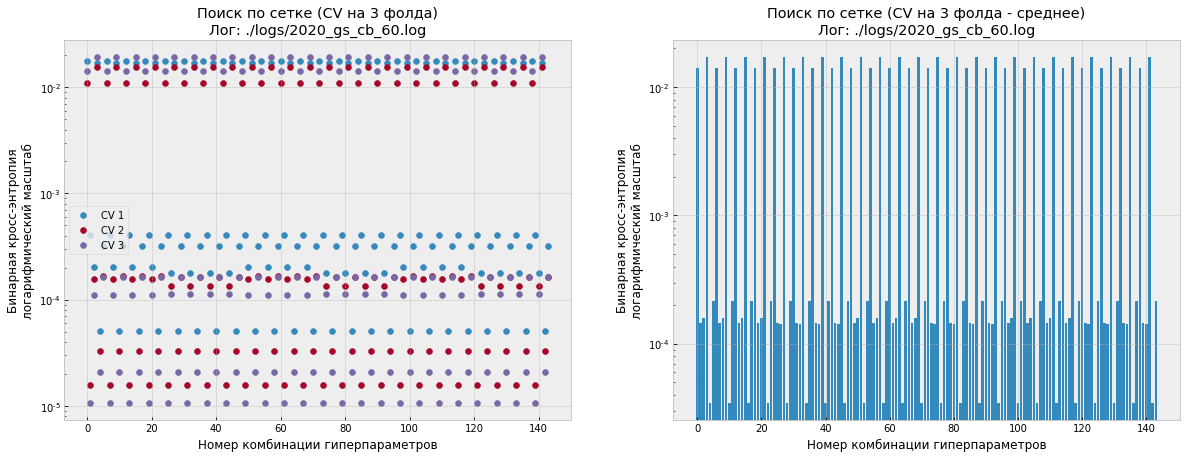

In [40]:
parse_log("./logs/2020_gs_cb_60.log")

## Обучение классификаторов с лучшими гиперпараметрами

In [107]:
def get_train_val_idx(data) -> tuple:
    """Получение разбиения тестовой и валидационной выборки"""
    all_idx = [x for x in range(len(data))]
    train_idx = np.random.choice(all_idx, int(len(data) * .85), replace=False).tolist()
    val_idx = list(set(all_idx) - set(train_idx))
    return train_idx, val_idx

In [108]:
best_models = {}
train_idx = {}
val_idx = {}
for i in (0, 30, 60):
    f = open(f"./logs/2020_best_cb_{i}.log", "w")
    data["target"] = (data["Макс. ПДЗ за 2020 год, дней"] > i).astype(int)
    train_idx_sess, val_idx_sess = get_train_val_idx(data)
    train_idx[f"target_{i}"] = train_idx_sess
    val_idx[f"target_{i}"] = val_idx_sess
    best_models[f"target_{i}"] = CatBoostClassifier(**grid_search_res[f"target_{i}"], loss_function='CrossEntropy', eval_metric='Accuracy', iterations=FINAL_EPOCHS, task_type="GPU")
    best_models[f"target_{i}"].fit(
        data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))).iloc[train_idx_sess], data.iloc[train_idx_sess]["target"],
        eval_set=(data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))).iloc[val_idx_sess], data.iloc[val_idx_sess]["target"]),
        use_best_model=True, verbose=True, log_cout=f
    )
    best_models[f"target_{i}"].save_model(f'./models/cb_2020_{i}')
    f.close()
    print(f"Модель для порога {i}", best_models[f"target_{i}"].get_best_score(), "\n")

Модель для порога 0 {'learn': {'Accuracy': 1.0, 'CrossEntropy': 0.0005848097166835336}, 'validation': {'Accuracy': 0.7, 'CrossEntropy': 0.7703152656555176}} 

Модель для порога 30 {'learn': {'Accuracy': 1.0, 'CrossEntropy': 0.00043180591515585485}, 'validation': {'Accuracy': 0.9125, 'CrossEntropy': 0.3518242359161377}} 

Модель для порога 60 {'learn': {'Accuracy': 1.0, 'CrossEntropy': 0.00020542549188279789}, 'validation': {'Accuracy': 0.9, 'CrossEntropy': 0.36565921306610105}} 



In [109]:
def parse_log_train(name: str):
    with open(name, "r") as f:
        log = f.readlines()
    train_curve = []
    val_curve = []
    for row in log[:-3]:
        train_curve.append(float(row.split(":")[2].split("\t")[0]))
        val_curve.append(float(row.split(":")[3].split("\t")[0]))
        
    plt.figure(figsize=(10, 5))
    plt.title(f"Обучение лучшего классификатора\nЛог: {name}")
    plt.plot(train_curve, label="train")
    plt.plot(val_curve, label="val")
    plt.xlabel("Итерации")
    plt.ylabel("Точность (Accuracy)")
    plt.legend(loc="best")
    plt.plot()

## Метрика для классификатора по признаку Просрочка 0 (факт просрочки)

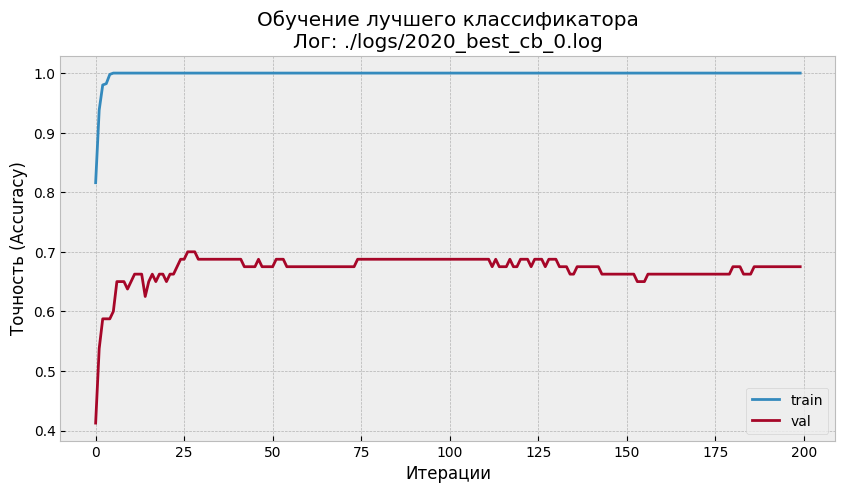

In [110]:
parse_log_train("./logs/2020_best_cb_0.log")

## Метрика для классификатора по признаку Просрочка 30 (факт просрочки свыше 30 дней)

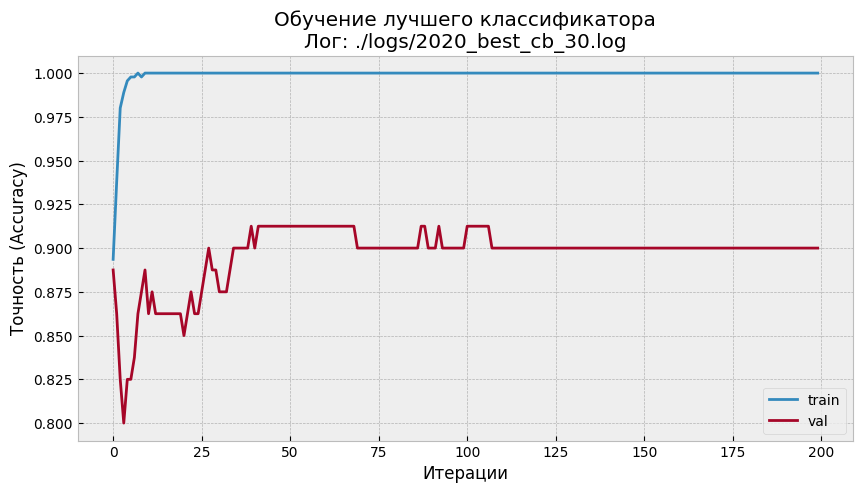

In [111]:
parse_log_train("./logs/2020_best_cb_30.log")

## Метрика для классификатора по признаку Просрочка 60 (факт просрочки свыше 60 дней)

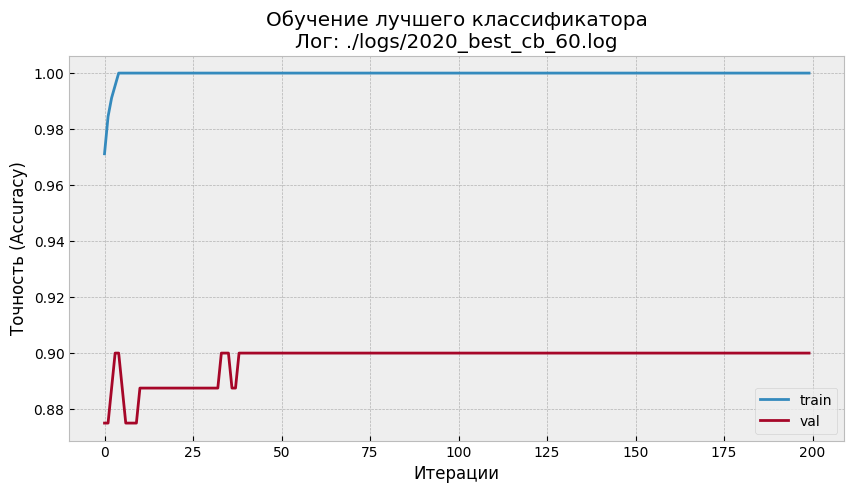

In [112]:
parse_log_train("./logs/2020_best_cb_60.log")

## Тестирование на валидационной выборке

Индексы для подвыборок обучения и валидации были получены выше, используем их для предотвращения смещения оценки результатов обучения.

In [113]:
def get_test_results(target_idx: int):
    data["target"] = (data["Макс. ПДЗ за 2020 год, дней"] > target_idx).astype(int)
    answer = best_models[f"target_{target_idx}"].predict(
        data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))).iloc[val_idx[f"target_{target_idx}"]]
    )
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax[0].scatter([x for x in range(len(answer))], answer - data.iloc[val_idx[f"target_{target_idx}"]]["target"])
    ax[0].set_title("Разница между предсказанием и истиной")
    ax[0].set_xlabel("№ объекта")
    ax[0].set_ylabel("true_class - pred_class")
    ax[1].scatter([x for x in range(len(answer))], answer + 0.2, label="Предсказание")
    ax[1].scatter([x for x in range(len(answer))], data.iloc[val_idx[f"target_{target_idx}"]]["target"], label="Истина")
    ax[1].legend(loc="best")
    ax[1].set_title("Предсказания для валидации")
    ax[1].set_xlabel("№ объекта")
    ax[1].set_ylabel("Класс")
    plt.show()
    print(f"Точность (accuracy): ", end=" ")
    print(
        best_models[f'target_{target_idx}'].score(
            data.drop(columns=targets + ['Наименование ДП', 'target']).reindex(columns = sorted(list(data.columns))).iloc[val_idx[f'target_{target_idx}']],
            y=data.iloc[val_idx[f"target_{target_idx}"]]["target"]
        )
    )

### Результаты для порога 0

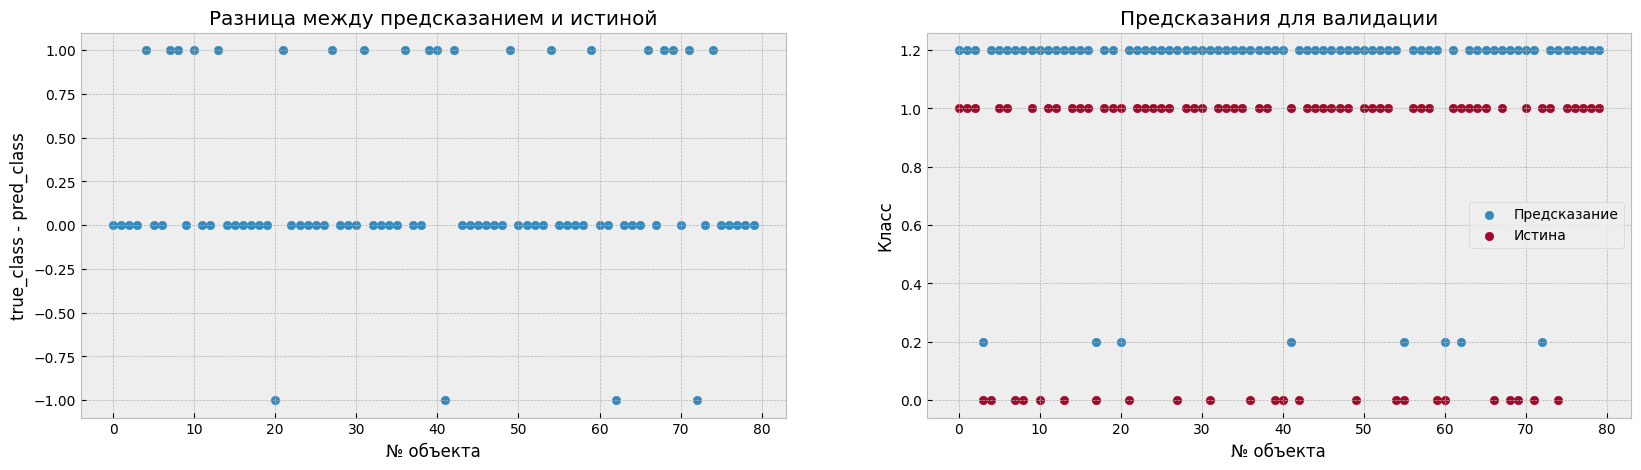

Точность (accuracy):  0.7


In [114]:
get_test_results(0)

### Результат для порога 30

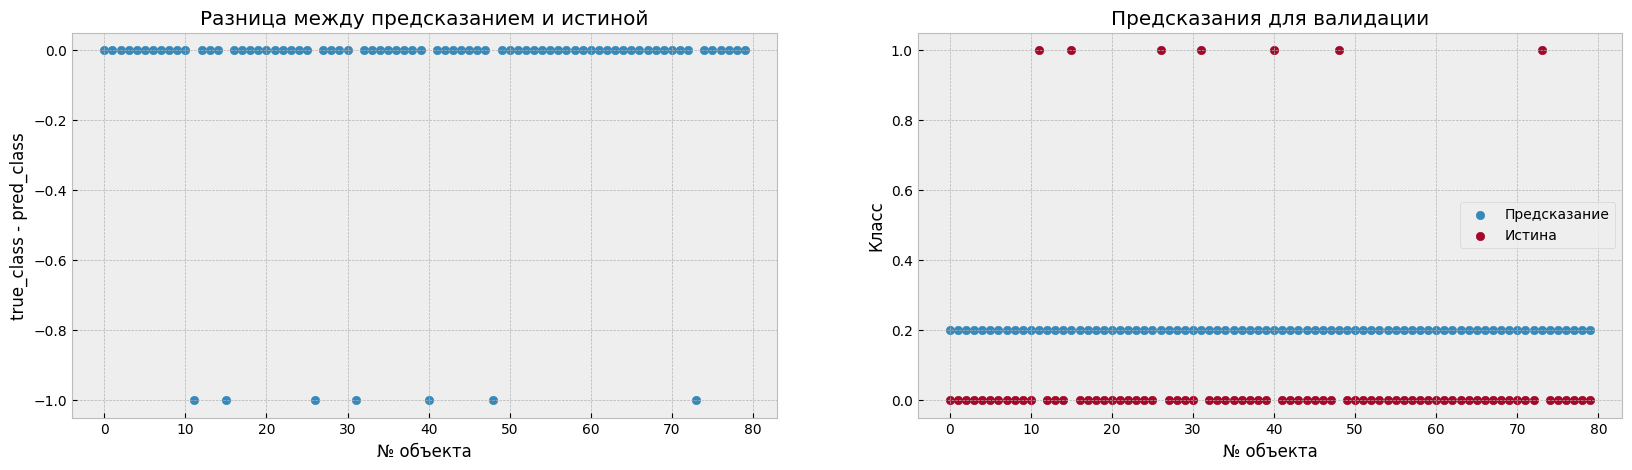

Точность (accuracy):  0.9125


In [115]:
get_test_results(30)

### Результат для порога 60

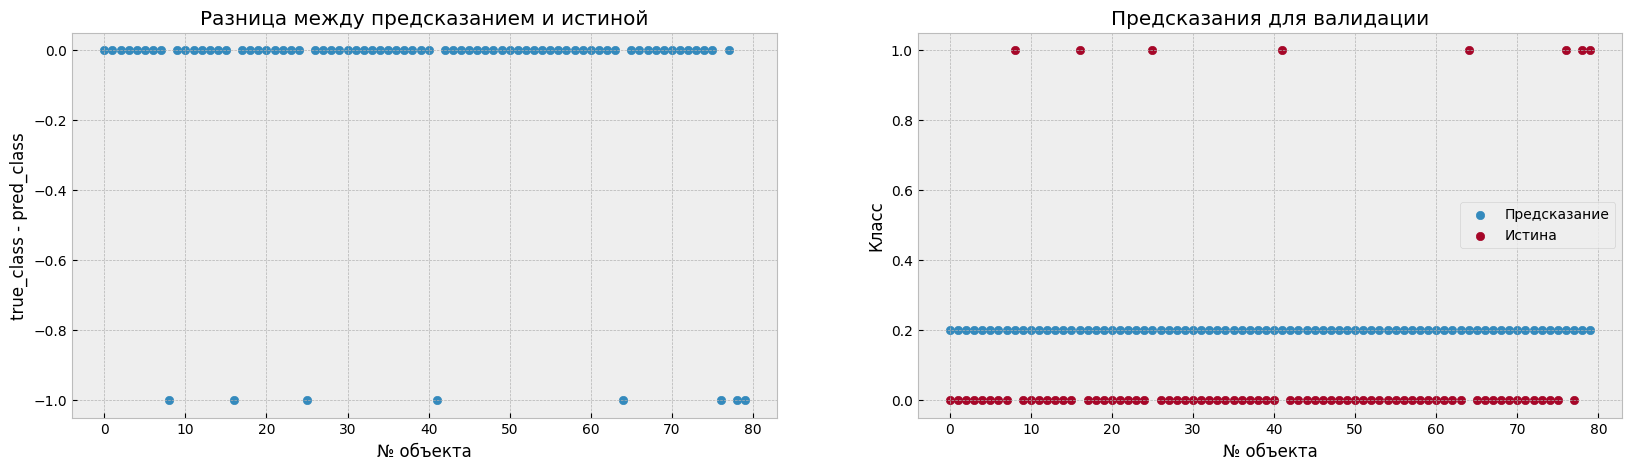

Точность (accuracy):  0.9


In [116]:
get_test_results(60)

## Влияние признаков

In [117]:
import shap

#для shap надо бы сетку plt отключить
plt.style.use("default")

In [118]:
def shap_coefs(target_idx: int):
    explainer = shap.Explainer(best_models[f"target_{target_idx}"])
    shap_values = explainer(data.drop(columns=targets + ["Наименование ДП", "target"]).reindex(columns = sorted(list(data.columns))))
    shap.plots.bar(shap_values)

### Коэффициенты Шапа для порога 0

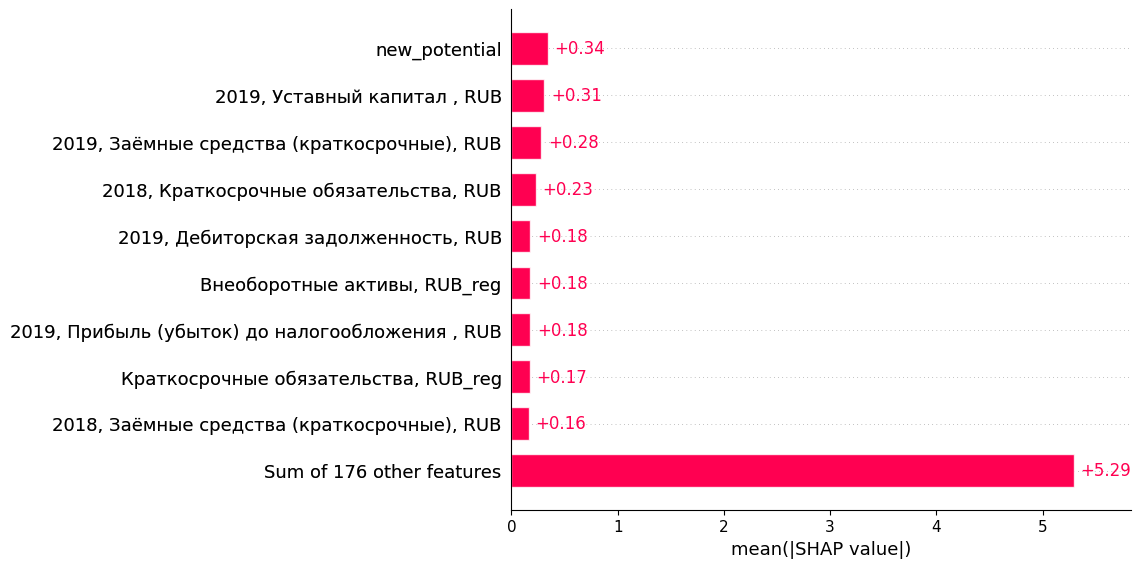

In [119]:
shap_coefs(0)

### Коэффициенты Шапа для порога 30

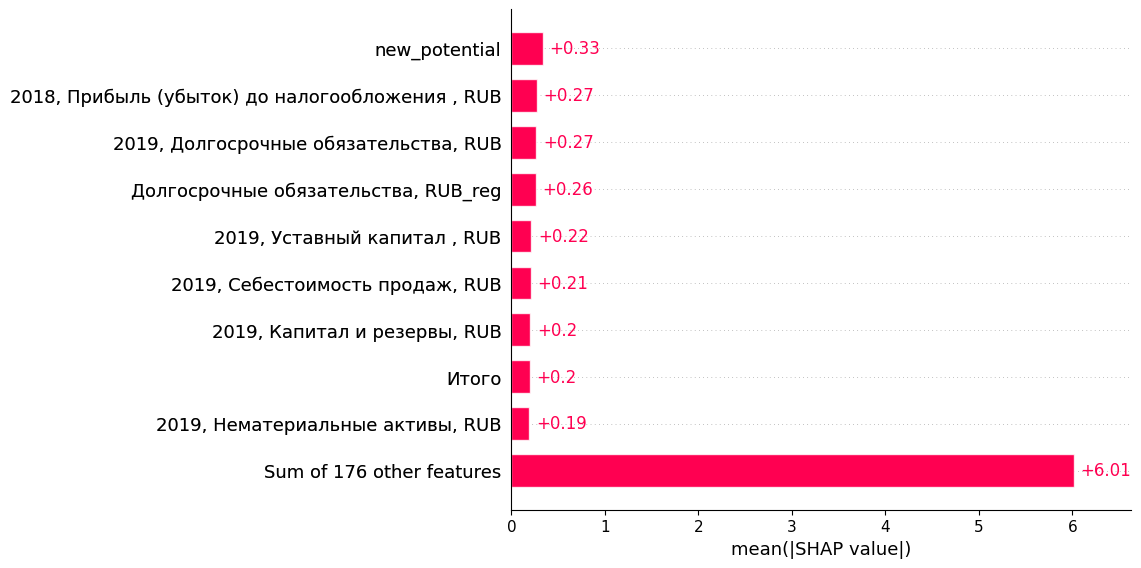

In [120]:
shap_coefs(30)

### Коэффициенты Шапа для порога 60

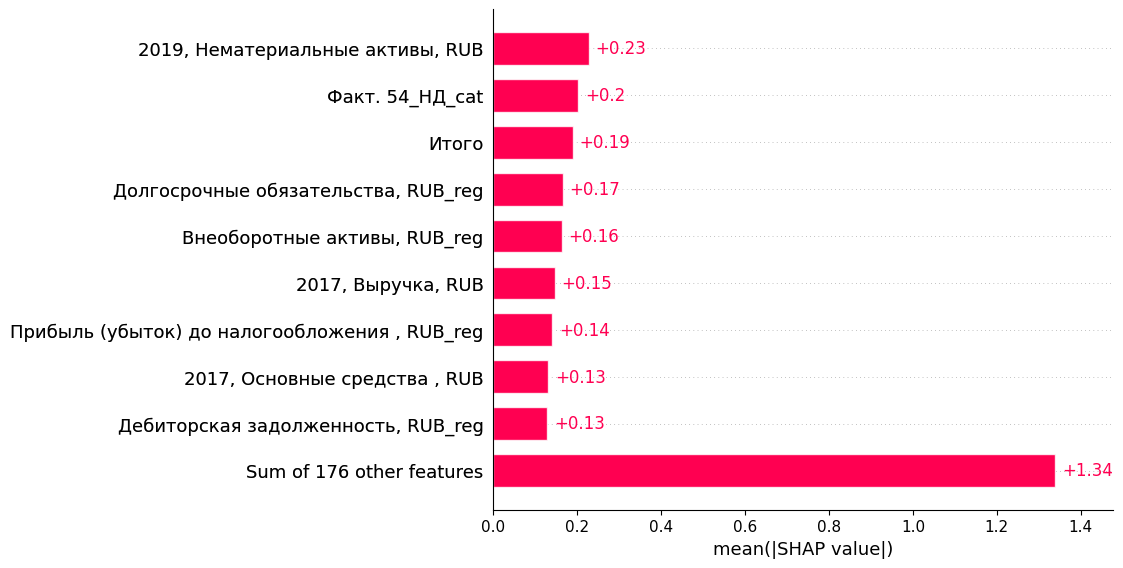

In [121]:
shap_coefs(60)

# Тест моделей на 2021 датасете

In [122]:
# Загрузка данных по 2021 году
data_test = pd.read_csv("./data/agents2021.csv")
data_test = data_test.drop(columns="Unnamed: 0")
data_test = reduce_mem_usage(data_test, verbose=True)
data_test.head()

Mem. usage decreased to  0.17 Mb (50.2% reduction)


,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.",...,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
0,0,0,0.0,0,0.000000,0,10,6.400000,4,2229696.5,...,NaN,NaN,NaN,NaN,NaN,5.0,0,0,1,1
1,2,7,5.5,1,132825.296875,2,6,5.333333,2,3759242.0,...,NaN,NaN,NaN,NaN,NaN,25.0,0,0,1,1
2,4,2,2.0,0,0.000000,2,1,1.000000,0,0.0,...,NaN,NaN,NaN,NaN,NaN,10.0,0,0,0,0
3,5,0,0.0,0,0.000000,0,21,17.666666,5,4486079.0,...,NaN,NaN,NaN,NaN,NaN,20.0,0,0,0,1
4,6,0,0.0,0,0.000000,0,0,0.000000,0,0.0,...,NaN,NaN,NaN,NaN,NaN,20.0,0,0,0,0


In [123]:
for col in [x for x in data_test.columns if "Факт" in x]:
    data_test = data_test.rename(columns={col: col.replace(".", " ")})
for col in [x for x in data_test.columns if "Факт" in x]:
    data_test = data_test.rename(columns={col: col.replace("  ", " ")})
for col in [x for x in data_test.columns if "Факт" in x]:
    data_test = data_test.rename(columns={col: col.replace(" ", ". ")})

## Приводим факты к обучающему датасету

In [124]:
data_test = data_test.drop(columns=list(set([x for x in data_test.columns if "Факт" in x and "_" not in x]) - set([x for x in data.columns if "Факт" in x and "_" not in x])))

In [125]:
for col in [x for x in data.columns if "Факт" in x and "_" not in x]:
    if col not in list(data_test.columns):
        data_test[col] = -2
        data_test.at[str(col) + "_НД_cat"] = 1
        data_test.at[str(col) + "_X_cat"] = 1
    else:
        data_test[str(col) + "_X_cat"] = 0
        data_test[str(col) + "_НД_cat"] = 0
        data_test.at[data_test[col] == "Х", str(col) + "_X_cat"] = 1
        data_test.at[data_test[col] == "Н/Д", str(col) + "_НД_cat"] = 1
        data_test.at[data_test[col] == "Х", col] = -1
        data_test.at[data_test[col] == "Н/Д", col] = -2
        data_test[col] = data_test[col].fillna(-2)
        data_test[col] = data_test[col].astype(int)

In [126]:
data_test = data_test.drop(columns=[x for x in data_test if "2016" in x])

**Приведение годов**

Из годов датафрейма 2021 вычтем 1 для того что бы разложить данные в структуру классификатора. Желательно конечно было это все изначально переименовывать, но поздо додумались 😑

In [127]:
import re

In [128]:
for col in [x for x in data_test.columns if "20" in x]:
    result = re.search(r'\b\d{4}\b', col).group(0)
    new_col = col.replace(result, str(int(result)-1))
    data_test = data_test.rename(columns={col: new_col})

In [129]:
ts_features = {}
for feature in data_test.columns:
    if feature[:2] == "20" and feature[6:] not in ts_features.keys():
        ts_features[feature[6:]] = []

for feature in data_test.columns:
    if feature[6:] in ts_features.keys():
        ts_features[feature[6:]].append(feature[:4])

# Сортировка, если перепутана темпоральность
for key, value in ts_features.items():
    ts_features[key] = sort(value)
        
print(f"Признаки с глубиной по времени\n{'признак':45s}|доступные годы\n{'-' * 45}|{'-' * 25}")
for key, value in ts_features.items():
    print(f"{key:45s}|{', '.join(value)}")

Признаки с глубиной по времени
признак                                      |доступные годы
---------------------------------------------|-------------------------
Нематериальные активы, RUB                   |2016, 2017, 2018, 2019
Основные средства , RUB                      |2016, 2017, 2018, 2019
Внеоборотные активы, RUB                     |2016, 2017, 2018, 2019
Дебиторская задолженность, RUB               |2016, 2017, 2018, 2019
Оборотные активы, RUB                        |2016, 2017, 2018, 2019
Уставный капитал , RUB                       |2016, 2017, 2018, 2019
Капитал и резервы, RUB                       |2016, 2017, 2018, 2019
Заёмные средства (долгосрочные), RUB         |2016, 2017, 2018, 2019
Долгосрочные обязательства, RUB              |2016, 2017, 2018, 2019
Заёмные средства (краткосрочные), RUB        |2016, 2017, 2018, 2019
Кредиторская задолженность, RUB              |2016, 2017, 2018, 2019
Краткосрочные обязательства, RUB             |2016, 2017, 2018, 2019
Выручка,

In [130]:
# Добавление признаков в датафрейм
for idx, (key, value) in enumerate(ts_features.items()):
    print(f"Обработка \'{key}\':", end="\n   ")
    data_test = regressor_on_feature(data_test, [f"{value[0]}, {key}", f"{value[1]}, {key}", f"{value[2]}, {key}", f"{value[3]}, {key}"], key)

Обработка 'Нематериальные активы, RUB':
   Количество четверок с '0': 195,  Добавление категорильной переменной 'Нематериальные активы, RUB_cat'
Обработка 'Основные средства , RUB':
   Количество четверок с '0': 8,  Добавление категорильной переменной 'Основные средства , RUB_cat'
Обработка 'Внеоборотные активы, RUB':
   Количество четверок с '0': 7,  Добавление категорильной переменной 'Внеоборотные активы, RUB_cat'
Обработка 'Дебиторская задолженность, RUB':
   Количество четверок с '0': 2,  Добавление категорильной переменной 'Дебиторская задолженность, RUB_cat'
Обработка 'Оборотные активы, RUB':
   Количество четверок с '0': 2,  Добавление категорильной переменной 'Оборотные активы, RUB_cat'
Обработка 'Уставный капитал , RUB':
   Количество четверок с '0': 38,  Добавление категорильной переменной 'Уставный капитал , RUB_cat'
Обработка 'Капитал и резервы, RUB':
   Количество четверок с '0': 2,  Добавление категорильной переменной 'Капитал и резервы, RUB_cat'
Обработка 'Заёмные средс

>**Дополнительные данные такие же как в 2020 году, смещенные на 1 год (самый старый год удален, добавлен новый)**

In [131]:
addition_data = {
    "metallurgical_production_index" : [100.1, 101.7, 100,6],
    "manufacture_of_steel_pipes" : [106.3, 103.2, 103,1],
    "manufacture_of_other_steel_products" : [106.1, 102.7, 108,9],
    "final_metal_products" : [112.7, 103.4, 101.3],
    "machines_products" : [106.8, 99.4, 97,6],
    "usd_rub_init" : [59.89, 57.04, 74,29],
    "usd_rub_min" : [55.84, 57.67, 73,18],
    "usd_rub_max" : [60.75, 69.97, 74,89],
}

addition_data_2 = {
    "ppi_pd" : [124.6, 125.5, 127.3, 127.6, 128.5],
    "usd_rub_init" : [60.98, 56.13, 68.44, 63.59, 75.15],
    "gdp" : [0.2,1.8 ,2.8 ,2,-3], 
    "unemployment" : [5.5, 5.2, 4.8, 4.6, 5.8],
    "inflation" : [5.39, 2.51, 4.26, 5.5, 4.91],
    "share" : [637, 908, 985, 899, 1293],
    "lmex" : [2753, 3389, 2908, 2597, 3453]    
}

for key, value in addition_data.items():
    for year, item_year in enumerate(value, start=2016):
        data_test[key + "_" + str(year)] = item_year

for key, value in addition_data_2.items():
    for year, item_year in enumerate(value, start=2016):
        data_test[key + "_" + str(year)] = item_year
        
data_test['new_potential'] =  data_test['2019, Нематериальные активы, RUB']+ \
data_test['2019, Основные средства , RUB']+ \
data_test['2019, Внеоборотные активы, RUB']+\
data_test['2019, Оборотные активы, RUB'] + \
data_test['2019, Капитал и резервы, RUB'] + \
data_test['2019, Прибыль (убыток) до налогообложения , RUB'] + \
data_test['2019, Прибыль (убыток) от продажи, RUB'] - \
data_test['2019, Дебиторская задолженность, RUB'] - \
data_test['2019, Заёмные средства (долгосрочные), RUB'] - \
data_test['2019, Долгосрочные обязательства, RUB'] - \
data_test['2019, Заёмные средства (краткосрочные), RUB'] - \
data_test['2019, Кредиторская задолженность, RUB'] -\
data_test['2019, Краткосрочные обязательства, RUB']

> Отсеиваем признаки, которых не было в 2020 году

In [132]:
data_test = data_test.drop(columns=list(set(data_test.columns) - set(data.drop(columns=targets + ["Наименование ДП", "target"]).columns)))

# Работа моделей

Данная секция производит предсказания для данных 2021 года, визуализирует их и возвращает датафрейм с 4 полями: 

```(Наименование ДП, Просрочка, Просрочка более 30 дней, Просрочка более 60 дней)```

**Визуализация по 50 случайны контрагентам**

In [133]:
# возвращаем стиль matplotlib
plt.style.use('bmh')

In [134]:
def get_results_2021() -> pd.DataFrame:
    """Получение предсказаний для 2021 года"""
    
    answer_0 = best_models[f"target_0"].predict(data_test.reindex(columns = sorted(list(data_test.columns))))
    answer_30 = best_models[f"target_30"].predict(data_test.reindex(columns = sorted(list(data_test.columns))))
    answer_60 = best_models[f"target_60"].predict(data_test.reindex(columns = sorted(list(data_test.columns))))
    
    answer = pd.DataFrame(pd.read_csv("./data/agents2021.csv")["Наименование ДП"])
    answer["Просрочка"] = answer_0.tolist()
    answer["Просрочка 30"] = answer_30.tolist()
    answer["Просрочка 60"] = answer_60.tolist()
    
    idx = np.random.choice([x for x in range(len(answer))], 20, replace=False)
    plt.figure(figsize=(10, 5))
    plt.scatter([x for x in range(20)], answer_0[idx], label="Просрочка >0 дней")
    plt.scatter([x for x in range(20)], answer_30[idx] + .15, label="Просрочка >30 дней")
    plt.scatter([x for x in range(20)], answer_60[idx] + .3, label="Просрочка >60 дней")
    plt.legend(loc="best")
    plt.show()
    return answer

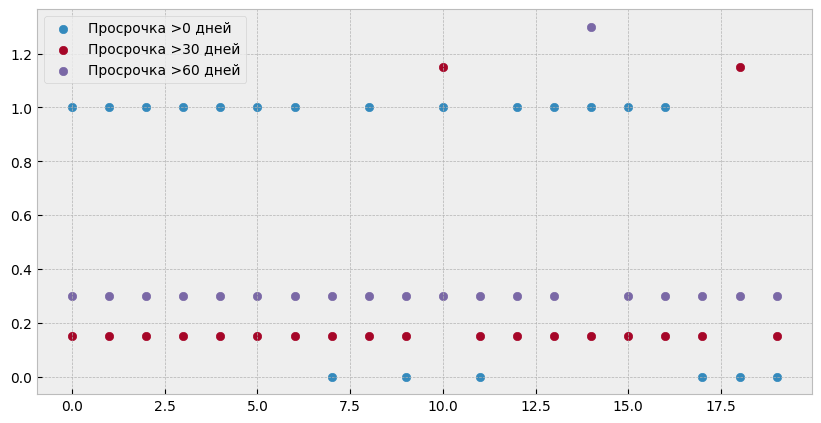

In [135]:
answer = get_results_2021()

Интерпретация графика:

Цвет - класс просрочки. Все что ниже $0.4$ - класс 0 [просрочки нет], все что выше 0.8 - класс 1 [просрочка есть].

## Обобщенная оценка

Сведем оценку классификаторов к следующей логике:
1. Если классификаторы подряд оценивают класс просрочки как положительный, финальная оценка - больший (по количеству дней) классификатор и его "флаг уверенности" `1`.
2. Если порядок нарушен (например `Просрочка > 0 == 0`, `Просрочка > 30 == 1` - оценка больший (по количеству дней) классификатор и его "флаг уверенности" `0`.  

Таким образом `флаг уверености` выступает индикатором согласованности предсказаний классификаторов.

In [136]:
def add_final_class(answer):
    """Аггрегация результатов"""
    
    answer["Флаг уверенности"] = 1
    answer["Просрочка Итог"] = 0
    for i in answer.index:
        if answer.loc[i, "Просрочка"] == 0 and answer.loc[i, "Просрочка 30"] == 0 and answer.loc[i, "Просрочка 60"] == 0:
            answer.at[i, "Просрочка Итог"] = 0
        if answer.loc[i, "Просрочка"] == 1 and answer.loc[i, "Просрочка 30"] == 1 and answer.loc[i, "Просрочка 60"] == 0:
            answer.at[i, "Просрочка Итог"] = 30
        if answer.loc[i, "Просрочка"] == 1 and answer.loc[i, "Просрочка 30"] == 1 and answer.loc[i, "Просрочка 60"] == 1:
            answer.at[i, "Просрочка Итог"] = 60
        else:
            answer.at[i, "Просрочка Итог"] = max(answer.loc[i, "Просрочка"], answer.loc[i, "Просрочка 30"], answer.loc[i, "Просрочка 60"])
            answer.at[i, "Флаг уверенности"] = 0
    return answer

In [137]:
answer = add_final_class(answer)

In [138]:
answer.head(10)

,Наименование ДП,Просрочка,Просрочка 30,Просрочка 60,Флаг уверенности,Просрочка Итог
0,0,0,0,0,0,0
1,2,1,0,0,0,1
2,4,1,0,0,0,1
3,5,1,0,0,0,1
4,6,0,0,0,0,0
5,7,1,0,0,0,1
6,8,1,0,0,0,1
7,9,1,1,0,0,1
8,12,1,0,0,0,1
9,13,1,0,0,0,1


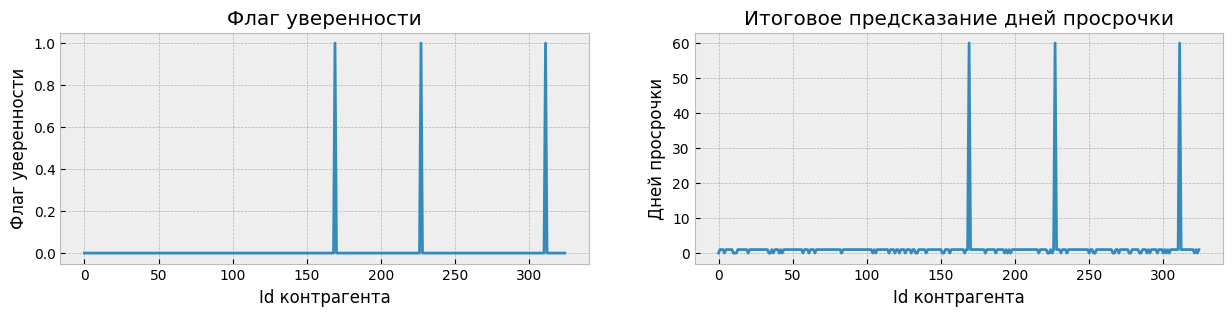

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
answer["Флаг уверенности"].plot(ax=ax[0])
ax[0].set_xlabel("Id контрагента")
ax[0].set_ylabel("Флаг уверенности")
ax[0].set_title("Флаг уверенности")
answer["Просрочка Итог"].plot(ax=ax[1])
ax[1].set_xlabel("Id контрагента")
ax[1].set_ylabel("Дней просрочки")
ax[1].set_title("Итоговое предсказание дней просрочки")
plt.show()

# Рекомендательная система

>**!Не успели переделать под 21 год! Оставили как было в 2019 году 😶**

In [30]:
best_models = {}
for i in (0, 5, 10):
    best_models[f"target_{i}"] = CatBoostClassifier().load_model(f"./models/cb_2019_{i}")
    print(f"Модлеь для порога {i} загружена")

Модлеь для порога 0 загружена
Модлеь для порога 5 загружена
Модлеь для порога 10 загружена


In [149]:
import os

class Recomend:
    
    __slots__ = ("models", "shap_values", "targets", "prev_data", "addition_data", "historical_data")
    def __init__(self, model_path, prev_data, historical_data):
        self.models = {}
        self.shap_values = {}
        self.prev_data = prev_data
        self.historical_data = historical_data
        
        for i in os.listdir(model_path):
            if i != ".ipynb_checkpoints": #TODO do norm
                self.models[i] = CatBoostClassifier().load_model(model_path + i)
        
        self.targets = [
            "Макс. ПДЗ за 2019 год, дней", "Сред. ПДЗ за 2019 год, дней", "Кол-во просрочек свыше 5-ти дней за 2019 год, шт.", 
            "Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.", "Кол-во раз ПДЗ за 2019 год, шт."
        ]
        
        self.addition_data = {
            "metallurgical_production_index" : [99.7, 100.1, 101.7],
            "manufacture_of_steel_pipes" : [95.3, 106.3, 103.2],
            "manufacture_of_other_steel_products" : [104.9, 106.1, 102.7],
            "final_metal_products" : [112.7, 103.4, 101.3],
            "machines_products" : [101.5, 106.8, 99.4],
            "usd_rub_init" : [72.92, 59.89, 57.04],
            "usd_rub_min" : [60.27, 55.84, 57.67],
            "usd_rub_max" : [83.59, 60.75, 69.97]
        }

    
    def _regressor_on_feature(self, inner_data: pd.DataFrame, cols: list, new_name: str, suffix: str="_reg", cat_suffix: str="_cat") -> pd.DataFrame:
        """Построение регрессии на основе секции выше: если есть строки со всеми нулями - добавление категориального признака, построение тренда"""
    
        triplets = inner_data[(inner_data[cols[0]] == 0) & (inner_data[cols[1]] == 0) & (inner_data[cols[2]] == 0)]
        inner_data[new_name + cat_suffix] = 0
        inner_data.at[triplets.index, new_name + cat_suffix] = 1
        inner_data[new_name + cat_suffix] = inner_data[new_name + cat_suffix].astype(int)
        
        inner_data[new_name + suffix] = 0
        for idx in inner_data[(inner_data[cols[0]] != 0) & (inner_data[cols[1]] != 0) & (inner_data[cols[2]] != 0)].index:
            inner_data.at[idx, new_name + suffix] = trendline([inner_data.loc[idx, cols[0]], inner_data.loc[idx, cols[1]], inner_data.loc[idx, cols[2]]])
        return inner_data
    
    def _preprocess_features(self, inner_data):
                
        ts_features = {}
        for feature in inner_data.columns:
            if feature[:2] == "20" and feature[6:] not in ts_features.keys():
                ts_features[feature[6:]] = []

        for feature in inner_data.columns:
            if feature[6:] in ts_features.keys():
                ts_features[feature[6:]].append(feature[:4])

        # Сортировка, если перепутана темпоральность
        for key, value in ts_features.items():
            ts_features[key] = sort(value)
        
        for idx, (key, value) in enumerate(ts_features.items()):
            inner_data = self._regressor_on_feature(inner_data, [f"{value[0]}, {key}", f"{value[1]}, {key}", f"{value[2]}, {key}"], key)

        inner_data = inner_data.reindex(columns=sorted(list(inner_data.columns)))
        inner_data = inner_data.drop(columns=self.targets + ["Наименование ДП"]).reindex(columns = sorted(list(data.columns)))
        for key, value in self.addition_data.items():
            for year, item_year in enumerate(value, start=2016):
                inner_data[key + "_" + str(year)] = item_year
        return inner_data
    
    def _aggregate_models(self, predictions):
        
        best_k = ""
        best_v = 0
        class_mark = 0
        
        for k, v in predictions.items():
            temp_class = np.argmax(v[0])
            temp_value = np.max(v[0])
            if temp_value > best_v:
                best_v = temp_value
                best_k = k
                class_mark = temp_class
        
        return class_mark, best_k, best_v
    
    def _get_percent(self, data_row, feature, sign_of_shap, sub_idx):
        subset = self.historical_data.drop(index=[sub_idx])
        if sign_of_shap:
            subset = subset[subset[feature] > data_row[feature].values[0]]
            answ = len(subset[subset["Макс. ПДЗ за 2019 год, дней"] > 0]) / len(self.historical_data) * 100
            return answ
        else:
            subset = subset[subset[feature] < data_row[feature].values[0]]
            answ = len(subset[subset["Макс. ПДЗ за 2019 год, дней"] > 0]) / len(self.historical_data) * 100
            return answ
            
    
    def _get_statistic_over_history(self, shap_values, data_row, sub_idx):
        detail_report = ""
        data_cols = list(data_row.columns)
        answ = pd.DataFrame(columns=["Признак", "Вклад", "Аналогичные"])
        for idx, value in enumerate(shap_values[0].values):
            if value != 0:
                answ = answ.append({
                    "Признак": data_cols[idx],
                    "Вклад": value,
                    "Аналогичные": f"{self._get_percent(data_row, data_cols[idx], value < 0, sub_idx):.1f}"
                }, ignore_index=True)
        answ = answ.sort_values(by="Вклад", ascending=True)
        answ = answ.reset_index(drop=True)
        answ = answ.iloc[:5]
        print(answ)
    
    def explain(self, data_row, idx):
        """Загрузка показатель из начального датасета"""
        agent_id = int(data_row["Наименование ДП"].values[0])
        data_row = self._preprocess_features(data_row)
        predictions = {}
        for k, m in self.models.items():
            explainer = shap.Explainer(m)
            self.shap_values[k] = explainer(data_row)
            predictions[k] = m.predict_proba(data_row)
        class_mark, best_k, best_v = self._aggregate_models(predictions)
        answ = f"Контрагент {agent_id} классифицирован как "
        if class_mark == 0:
            answ += f"\'контрагент с низким риском\' [{best_v * 100:.1f}%]\n"
        else:
            answ += f"\'контрагент с высоким риском\' [{best_v * 100:.1f}%]\n"
        answ += "Наиболее значимые параметры контрагента, повлиявшие на решение:"
        print(answ)
        shap.plots.waterfall(self.shap_values[best_k][0])
        
        detail = f"\n\n" + "=" * 5 + " Сводка по наиболее значимым признакам" + "=" * 5 + "\n"
        detail += "[предполагается наличие исторических данных]\n[\'Аналогичные\' контрагенты - процент, допустивших ПДЗ по данному критерию (выше/ниже) в зависимости от \'Вклада\']\n"
        print(detail)
        self._get_statistic_over_history(self.shap_values[best_k], data_row, idx)
        return

In [150]:
# Загрузка отдельного датасета для проверки корректности работы класса
new_data = pd.read_csv("./data/agents2019.csv")
new_data = new_data.drop(columns=["Unnamed: 0"])

In [151]:
a = Recomend("./models/", new_data, data) # Инициализация

Введите индекс строки для построения отчета: 333


Контрагент 333 классифицирован как 'контрагент с низким риском' [60.5%]
Наиболее значимые параметры контрагента, повлиявшие на решение:


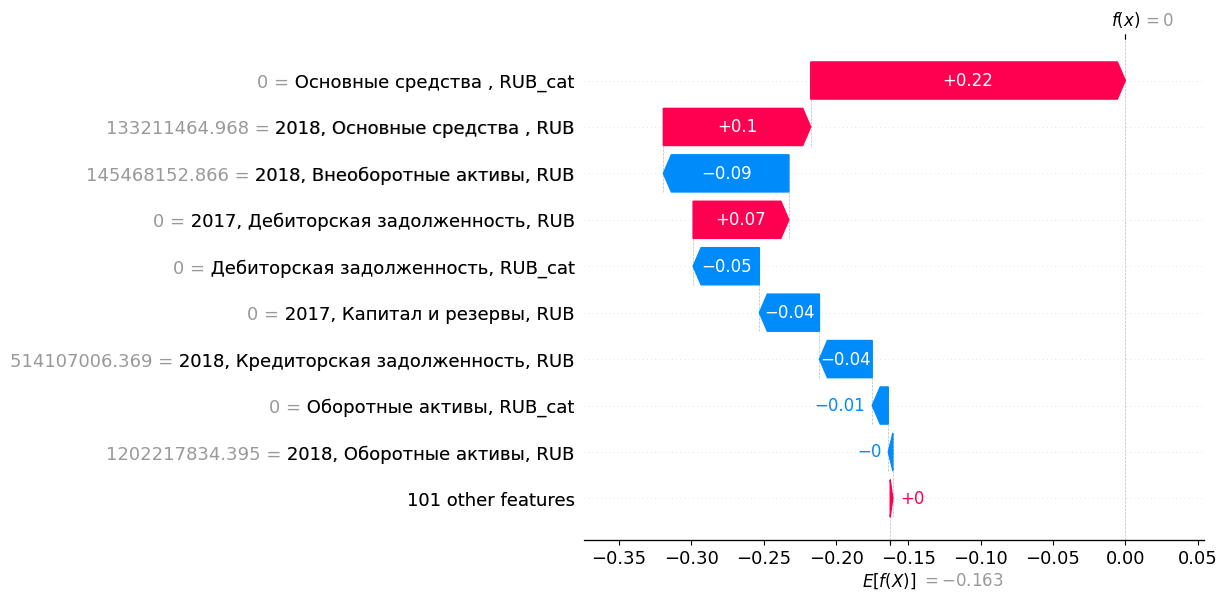



===== Сводка по наиболее значимым признакам=====
[предполагается наличие исторических данных]
['Аналогичные' контрагенты - процент, допустивших ПДЗ по данному критерию (выше/ниже) в зависимости от 'Вклада']

                                 Признак     Вклад Аналогичные
0         2018, Внеоборотные активы, RUB -0.086789        20.9
1     Дебиторская задолженность, RUB_cat -0.045797         1.1
2           2017, Капитал и резервы, RUB -0.041558        48.6
3  2018, Кредиторская задолженность, RUB -0.036495        16.0
4              Оборотные активы, RUB_cat -0.011097         1.1


In [158]:
global_index = int(input("Введите индекс строки для построения отчета:"))
a.explain(pd.DataFrame(pd.DataFrame(new_data.iloc[global_index]).T), global_index) # Получение объяснений (индекс для исключения из рассмотрения строки - для примера нет данных иных)

**истинное значение**

In [159]:
new_data.iloc[global_index][[
    "Макс. ПДЗ за 2019 год, дней", "Сред. ПДЗ за 2019 год, дней", "Кол-во просрочек свыше 5-ти дней за 2019 год, шт.", 
    "Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.", "Кол-во раз ПДЗ за 2019 год, шт."
]].astype(int)

Макс. ПДЗ за 2019 год, дней                          0
Сред. ПДЗ за 2019 год, дней                          0
Кол-во просрочек свыше 5-ти дней за 2019 год, шт.    0
Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.    0
Кол-во раз ПДЗ за 2019 год, шт.                      0
Name: 333, dtype: int32